INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 5, 'problem': 'Rastrigin', 'problem_size': 100, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 112010it [03:05, 603.92it/s]                             
INFO:root:Socjo finished in 9.213672427336375
Progress: 112010it [00:37, 2957.75it/s]                            
INFO:root:comparison finished in 9.342505872249603
INFO:root:best socjo 164.26281861875856 best single 215.17688291843035


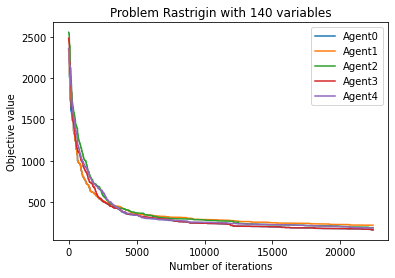

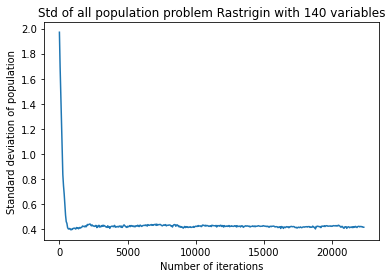

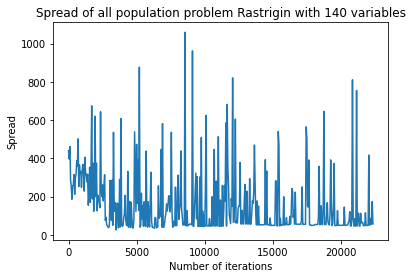

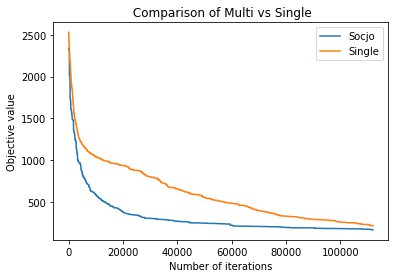

INFO:root:plotting finished in 0.026322360833485922
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 9.910104842980703
INFO:root:comparison finished in 8.950824272632598
INFO:root:best socjo 250.56723367932707 best single 196.2057957908341


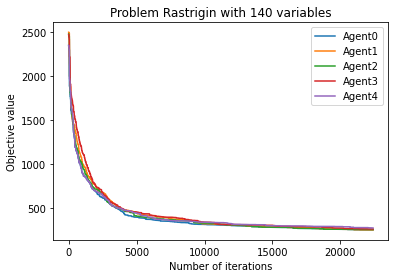

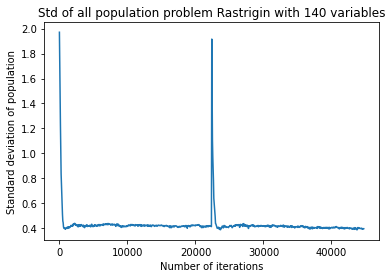

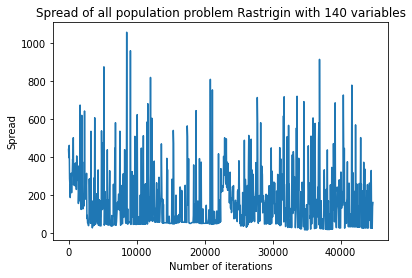

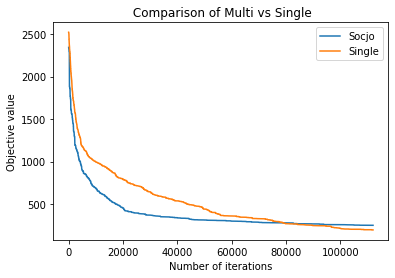

INFO:root:plotting finished in 0.025520618756612143
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 8.976446545124054
INFO:root:comparison finished in 8.597811420758566
INFO:root:best socjo 204.1090419954074 best single 167.55559140778104


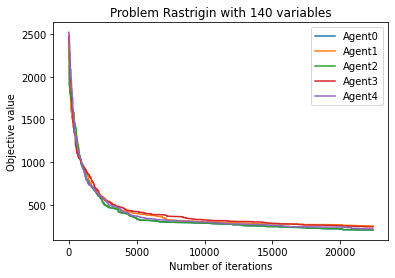

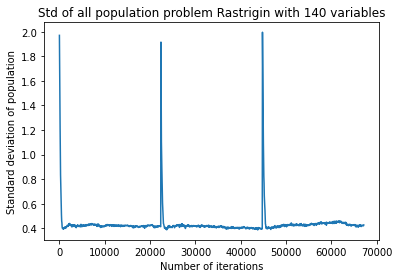

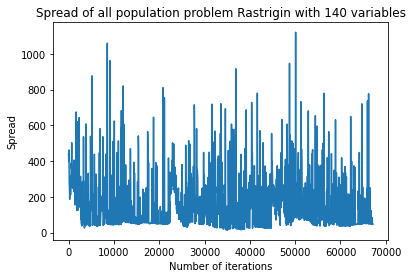

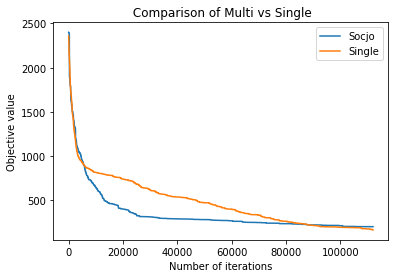

INFO:root:plotting finished in 0.02586605946222941
INFO:root:Run 2 out of 3


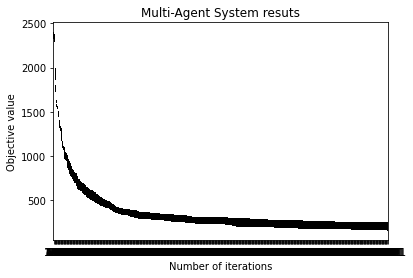

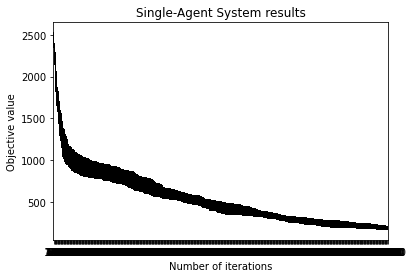

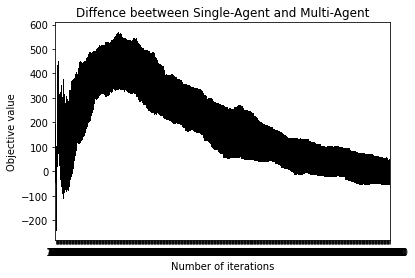

INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 5, 'problem': 'Griewank', 'problem_size': 100, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 112010it [03:28, 536.74it/s]                             
INFO:root:Socjo finished in 10.01123232046763
Progress: 112010it [00:40, 2786.43it/s]                            
INFO:root:comparison finished in 9.44075901110967
INFO:root:best socjo 0.1673135476691059 best single 0.06945646849131293


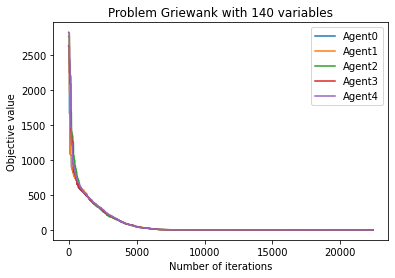

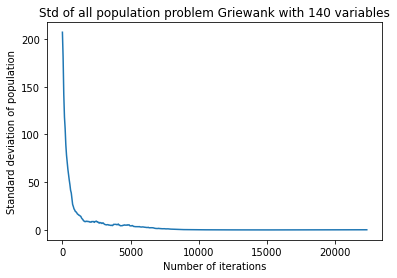

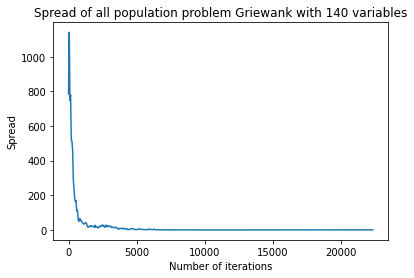

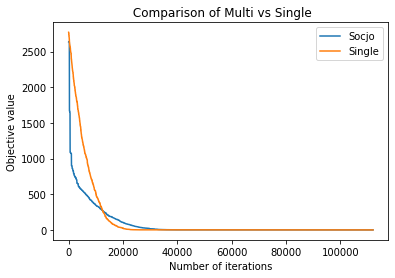

INFO:root:plotting finished in 0.022561570008595783
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 9.804006242752076
INFO:root:comparison finished in 9.405923386414846
INFO:root:best socjo 0.18093325620020673 best single 0.09504997708763141


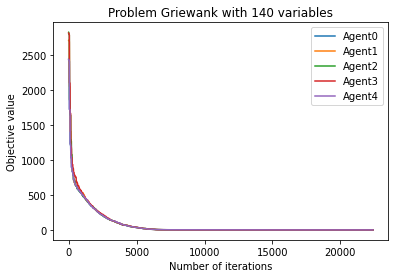

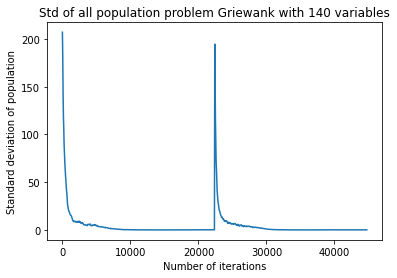

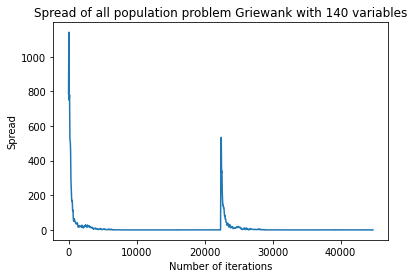

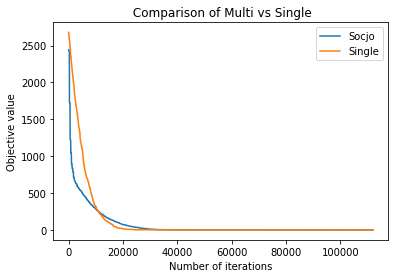

INFO:root:plotting finished in 0.022335731983184816
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 9.80385136604309
INFO:root:comparison finished in 8.114627790451049
INFO:root:best socjo 0.15517222238466843 best single 0.11648401617410897


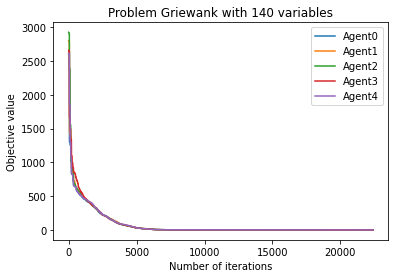

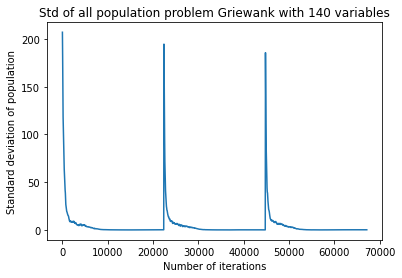

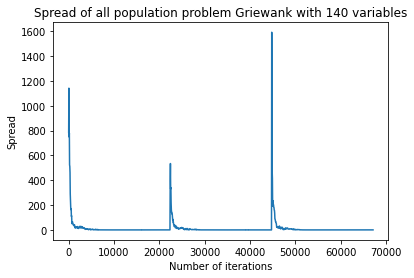

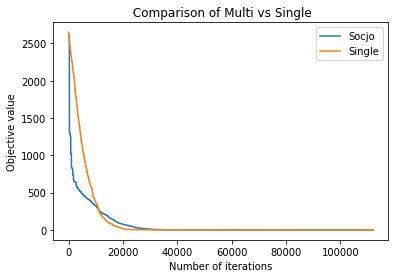

INFO:root:plotting finished in 0.0184610644976298
INFO:root:Run 2 out of 3


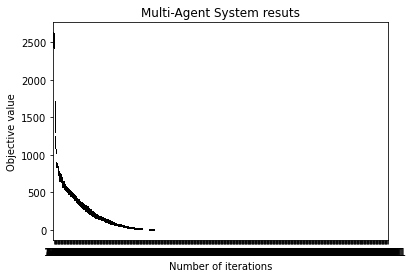

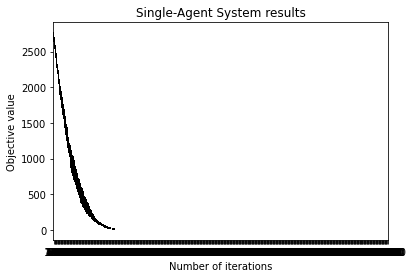

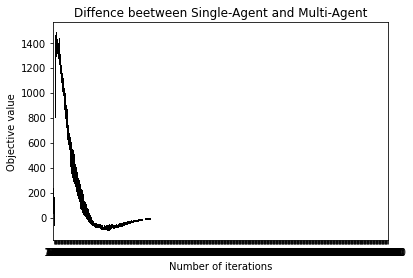

INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 5, 'problem': 'Ackley', 'problem_size': 100, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 112010it [02:14, 833.08it/s]                             
INFO:root:Socjo finished in 6.579269735018412
Progress: 112010it [00:25, 4336.91it/s]                            
INFO:root:comparison finished in 6.243814635276794
INFO:root:best socjo 0.2818650045897475 best single 0.3550347744579949


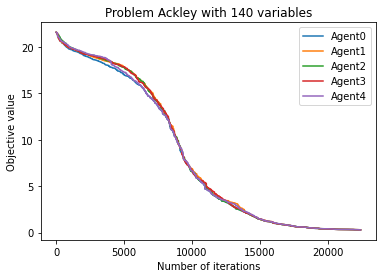

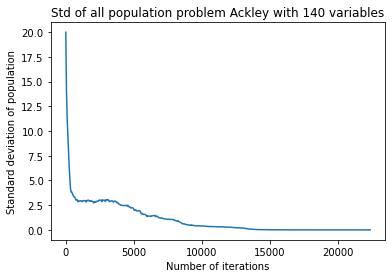

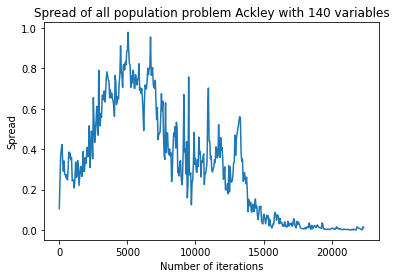

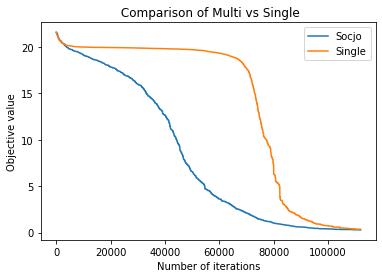

INFO:root:plotting finished in 0.018483964602152507
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 6.484566752115885
INFO:root:comparison finished in 6.244750018914541
INFO:root:best socjo 0.27159864986864024 best single 0.39493660404926745


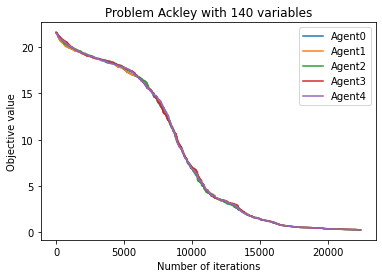

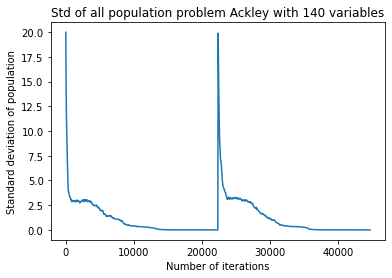

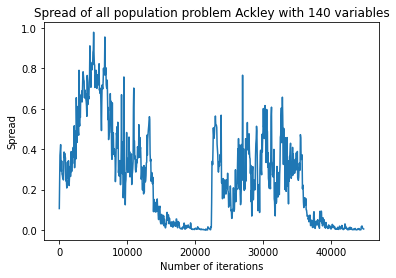

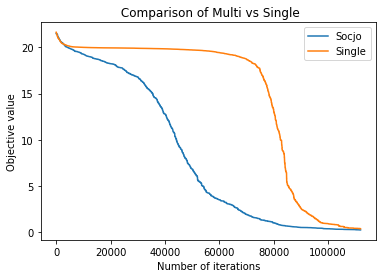

INFO:root:plotting finished in 0.017613271872202556
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 6.401834106445312
INFO:root:comparison finished in 6.201945928732554
INFO:root:best socjo 0.2536459829588762 best single 0.3084346553697874


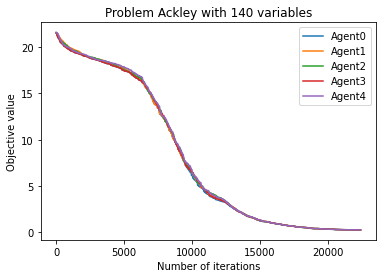

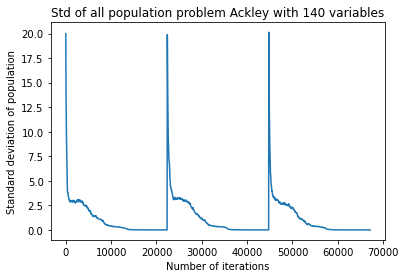

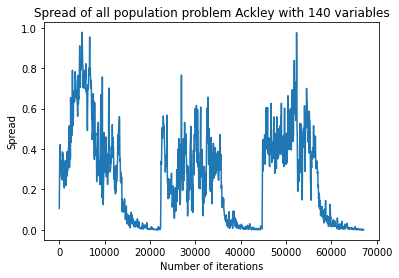

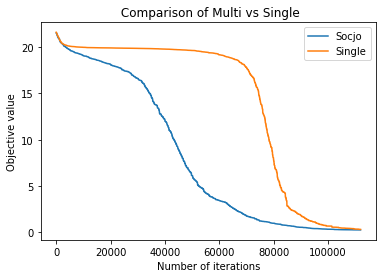

INFO:root:plotting finished in 0.018062118689219156
INFO:root:Run 2 out of 3


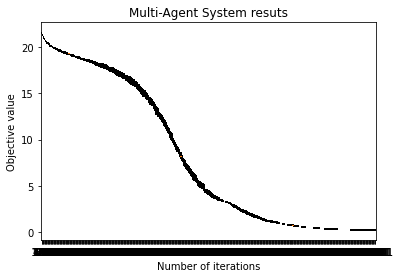

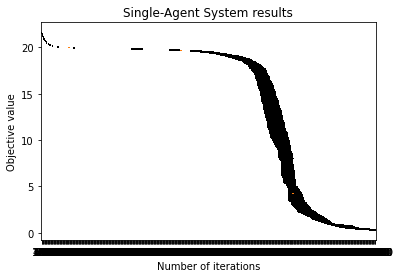

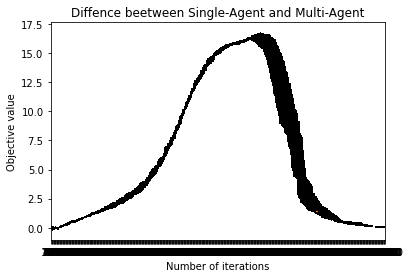

In [2]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner
from time import time

time1 =  time()

for config in ["config_R.json","config_G.json", "config_A.json"]:
    with open(config,"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    config.problem.__init__(140)
    iterations = config.problem.number_of_variables * 800
    Agents, Agent_Reference = create_agents_float_solution(config)     
    runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference, max_iterations=iterations)
    Statistic_runner = StatisticRunner(runner)
    Statistic_runner.run_an_collect_data(no_runs = 3, cycles=int(iterations/50/config.noAgents) , cycle_iter=50, num_of_comm=2)
    if settings.enable_plots:
        Statistic_runner.plot()